In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


![image](https://miro.medium.com/v2/resize:fit:2550/0*GVjzZeYrir0R_6-X.png)

[image link](https://miro.medium.com/v2/resize:fit:2550/0*GVjzZeYrir0R_6-X.png)

In [5]:
df.drop(columns=['species']).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: xlabel='sepal_length', ylabel='petal_length'>

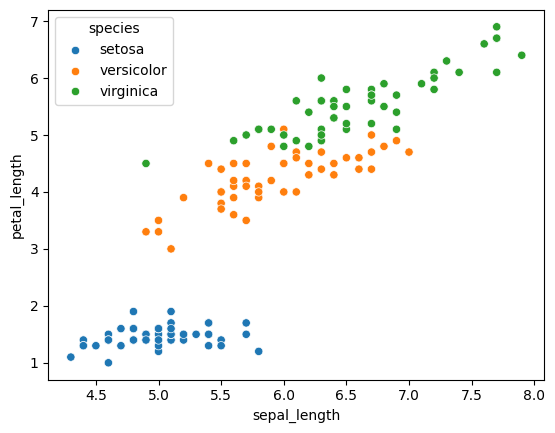

In [19]:
sns.scatterplot(data=df,x='sepal_length',y='petal_length',hue='species')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

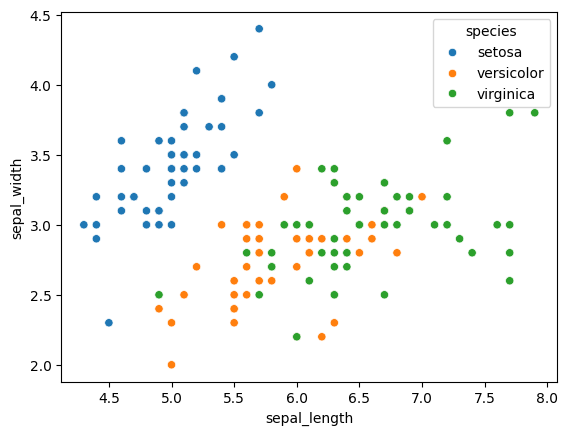

In [45]:
sns.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='species')

<Axes: xlabel='sepal_width', ylabel='petal_width'>

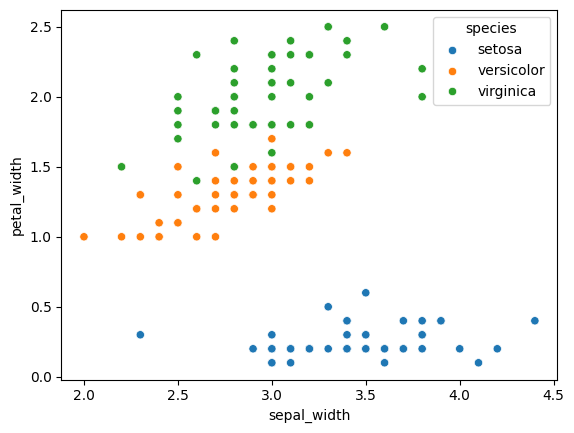

In [46]:
sns.scatterplot(data=df,x='sepal_width',y='petal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

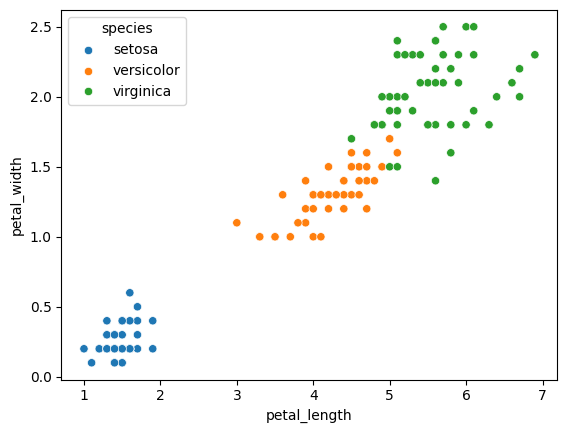

In [47]:
sns.scatterplot(data=df,x='petal_length',y='petal_width',hue='species')

### from above all the graphs we can clearly cluster the setosa , but there is a mismatch in versicolor and virginica

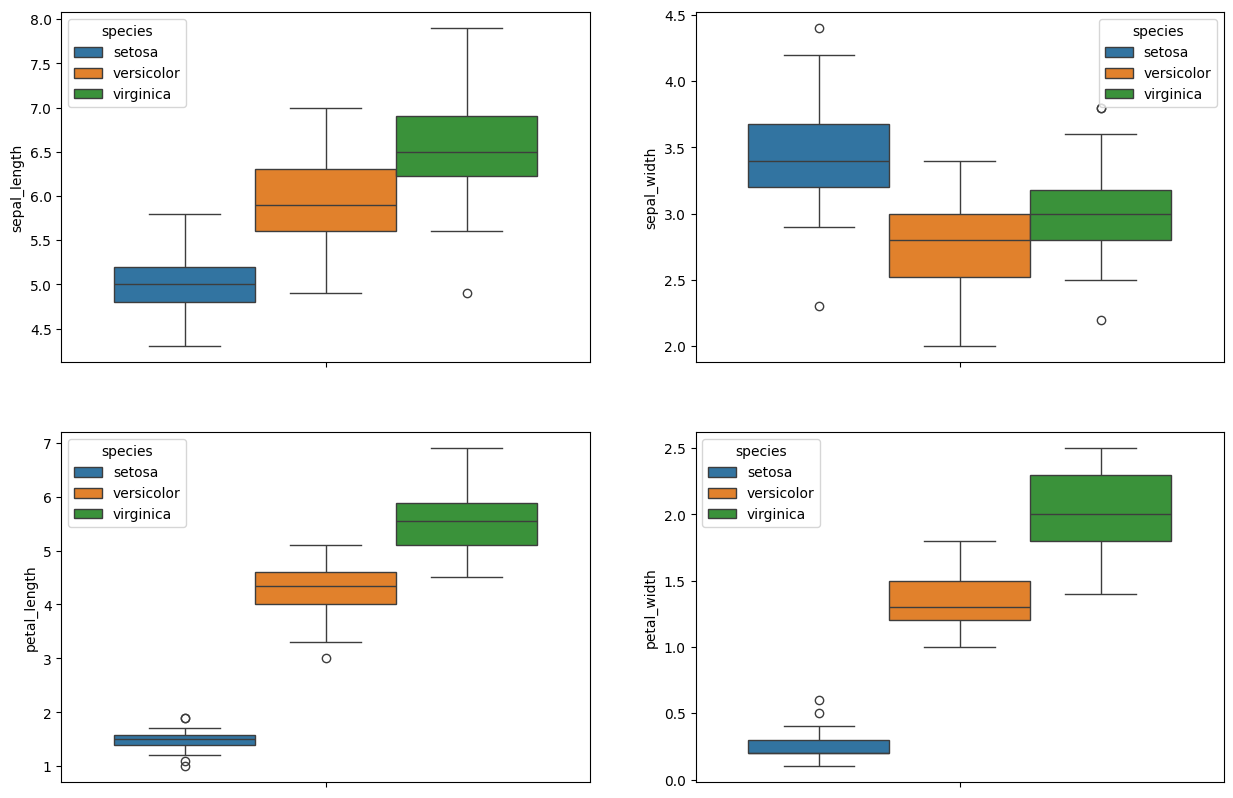

In [40]:
count = 1
plt.figure(figsize=(15,10))
for col in df.columns:
    if col != 'species':
        plt.subplot(2,2,count)
        sns.boxplot(data=df, y=col,hue='species')
        count = count+1

from above graph we can see the sepal length , petal lenth and petal width of setosa is less comared to versicolor and verginica but the sepal width is high

also to identify virginica and versicular sepal_length and petal length will play cruisial role

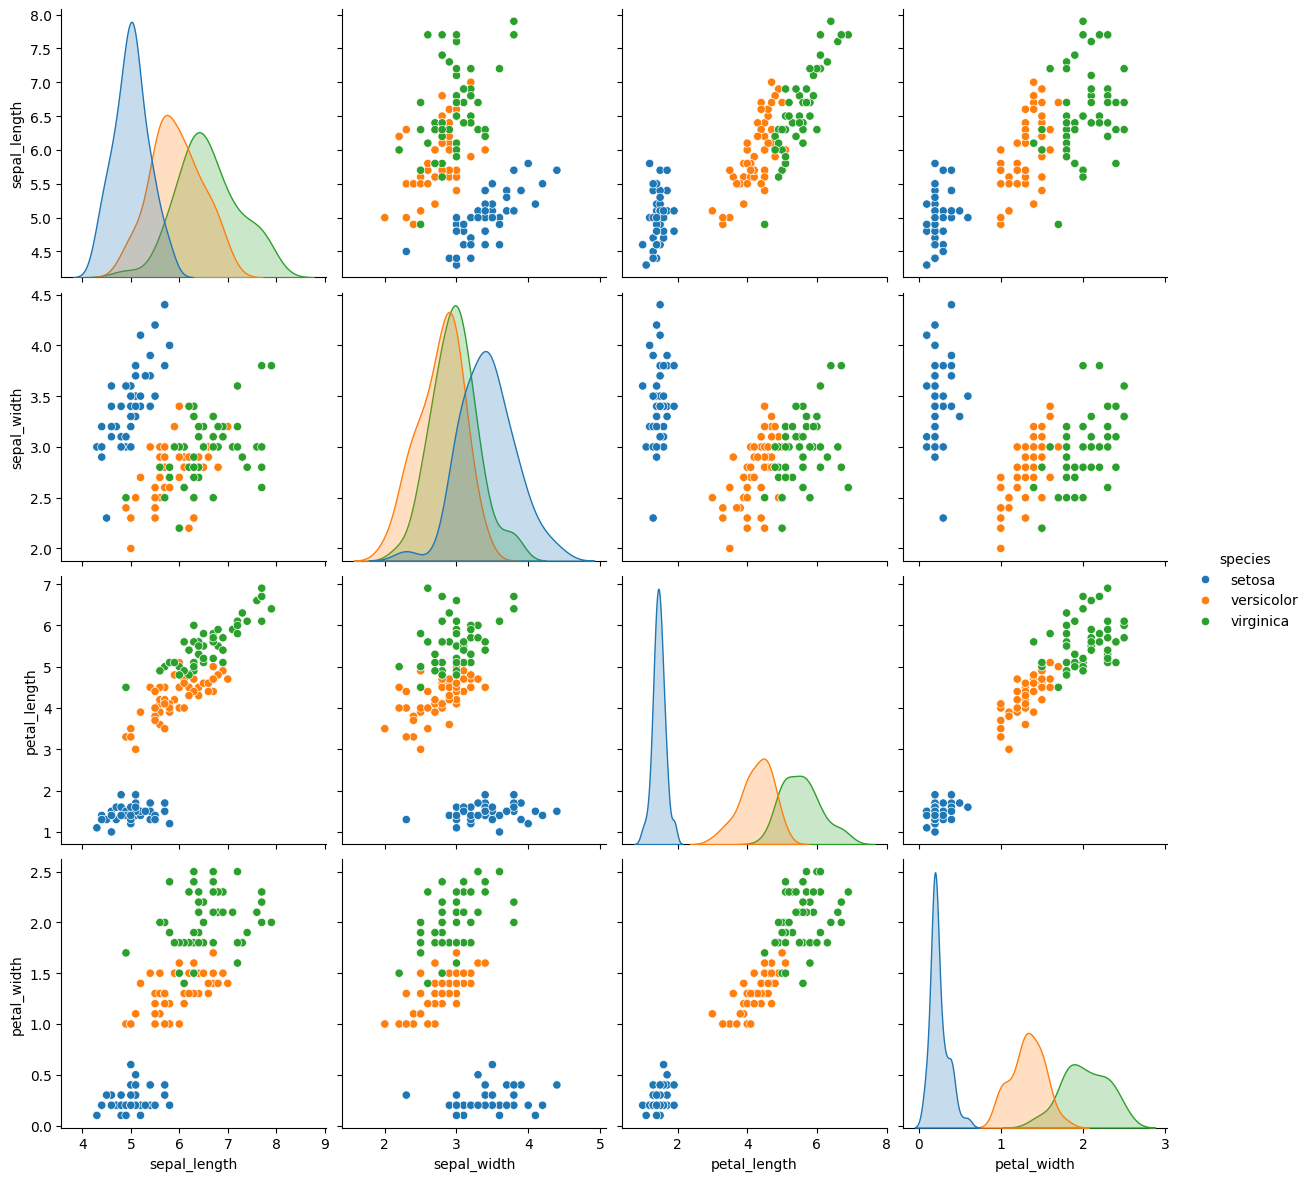

In [107]:
sns.pairplot(df,hue="species",height=3);
plt.show()

### model building

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
X = df.drop(columns=['species'],axis=1)
y = df['species']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2)

0.9473684210526315


<Axes: >

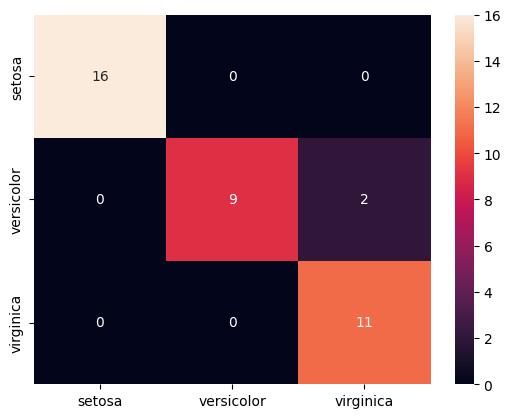

In [93]:
model = LogisticRegression(max_iter=100,multi_class='ovr')
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred), 
            annot=True,
            fmt='g', 
            xticklabels=['setosa','versicolor','virginica'],
            yticklabels=['setosa','versicolor','virginica'])

0.9736842105263158


<Axes: >

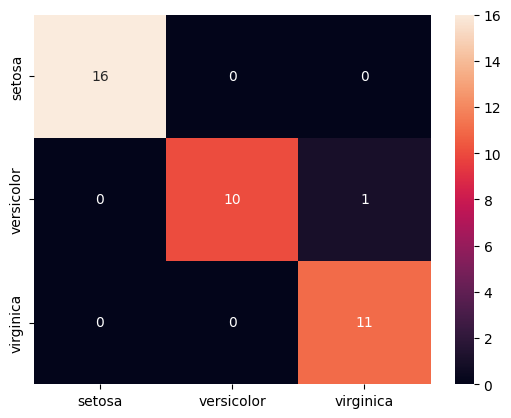

In [94]:
model = LogisticRegression(max_iter=200,multi_class='multinomial')
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred), 
            annot=True,
            fmt='g', 
            xticklabels=['setosa','versicolor','virginica'],
            yticklabels=['setosa','versicolor','virginica'])

1.0


<Axes: >

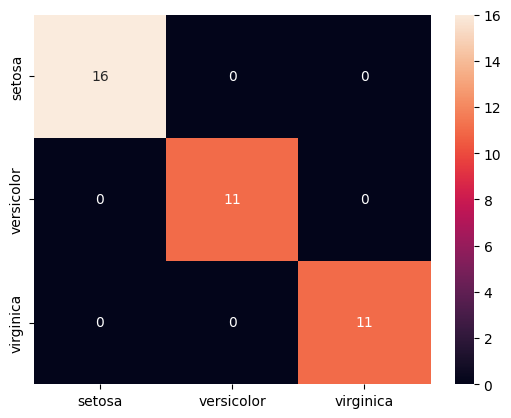

In [95]:
model = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred), 
            annot=True,
            fmt='g', 
            xticklabels=['setosa','versicolor','virginica'],
            yticklabels=['setosa','versicolor','virginica'])

1.0


<Axes: >

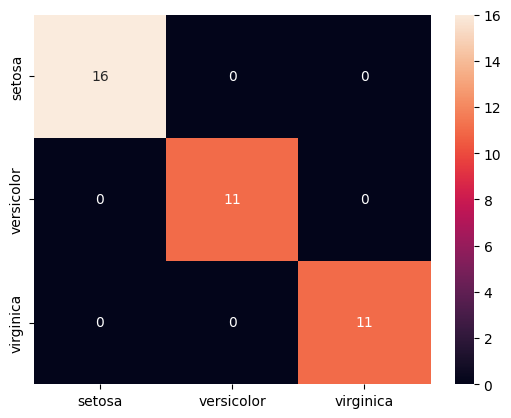

In [96]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred), 
            annot=True,
            fmt='g', 
            xticklabels=['setosa','versicolor','virginica'],
            yticklabels=['setosa','versicolor','virginica'])

In [100]:
lengths=df[['sepal_length','petal_length','species']]

0.9473684210526315


<Axes: >

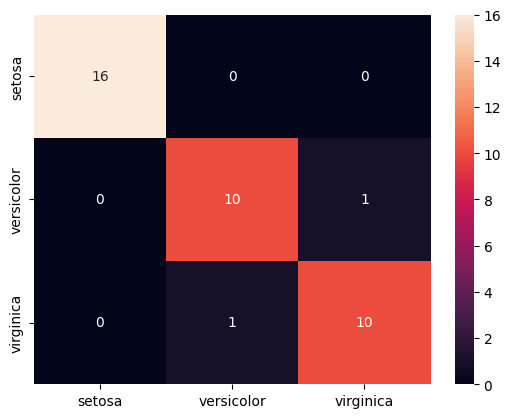

In [102]:
X1 = lengths.drop(columns=['species'],axis=1)
y1 = lengths['species']
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.25,random_state=2)
model = SVC(kernel='linear')
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred), 
            annot=True,
            fmt='g', 
            xticklabels=['setosa','versicolor','virginica'],
            yticklabels=['setosa','versicolor','virginica'])

0.9736842105263158


<Axes: >

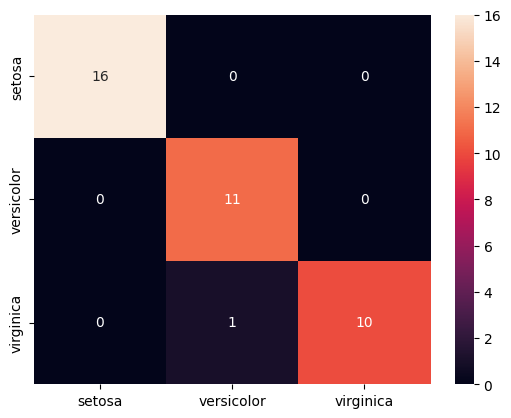

In [105]:
X1 = lengths.drop(columns=['species'],axis=1)
y1 = lengths['species']
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.25,random_state=2)
model = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred), 
            annot=True,
            fmt='g', 
            xticklabels=['setosa','versicolor','virginica'],
            yticklabels=['setosa','versicolor','virginica'])

## we are getting 97% accuracy by only seapl lenth and petal length

### clustering

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=150,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

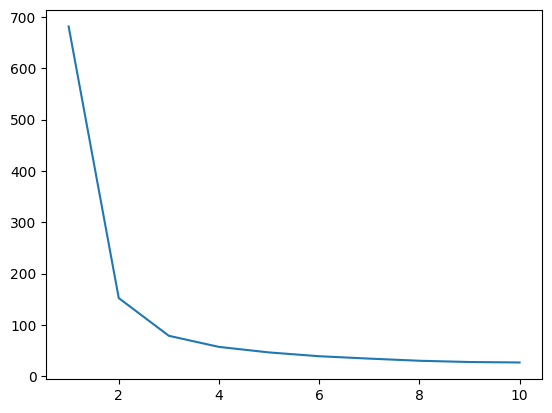

In [12]:
plt.plot(range(1, 11), wcss)

In [45]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=200,n_init=10)
y_menas = kmeans.fit_predict(X)

In [46]:
px.scatter_3d(data_frame=X,x='petal_length',y='sepal_length',
              z='petal_width',color=y_menas,labels=y_menas)

In [26]:
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering,DBSCAN

In [16]:
X1 = X.values

In [20]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_ = cluster.fit_predict(X1)

c:\Users\sanjay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [21]:
labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [36]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [42]:
px.scatter_3d(data_frame=X,x='petal_length',y='sepal_length',
              z='petal_width',color=labels_,labels=labels_)